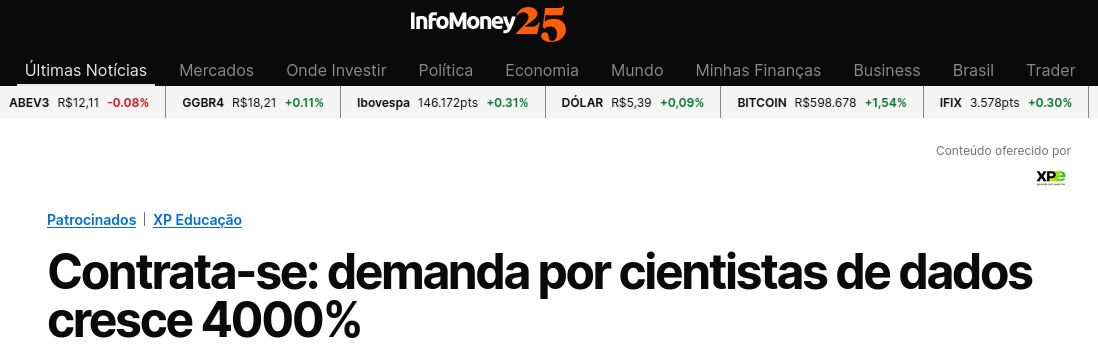



## DataScience nas Finanças

Data Science é o uso de dados, estatística e algoritmos para gerar insights e previsões que ajudam empresas a tomar decisões mais inteligentes.
No setor financeiro, isso significa transformar números em estratégias de lucro, segurança e eficiência.

- Análise de Investimentos

- Previsão de preços de ações e criptomoedas

- Identificação de tendências com séries temporais

- Criação de carteiras otimizadas (retorno x risco)

- Gestão de Risco e Crédito

- Avaliação automática da chance de inadimplência

- Modelos preditivos para definir limites de crédito

- Simulações de cenários econômicos

- Detecção de Fraudes

- Algoritmos que identificam transações suspeitas em tempo real

- Modelos que aprendem o comportamento normal de cada cliente

- Planejamento Financeiro e Fintechs

- Análise de gastos e categorização automática

- Recomendação personalizada de investimentos ou produtos

- Otimização de taxas e custos operacionais

Bom, dessa maneira vemos benefícios direito de DataScience no mundo das financias, onde temos a redução de riscos, aumento de rentabilidade, melhora na experiência do usuário, automatiza decisões complexas

# 💼 Data Science nas Finanças
### Análise de Retorno, Risco e Tendência de uma Ação

---

## 🧭 1. Entendendo o problema

Queremos responder à pergunta:

> "Qual é o comportamento e o risco do investimento em uma ação específica?"

Com isso, vamos:
- Coletar dados reais de ações
- Calcular indicadores financeiros (retorno, volatilidade e índice de Sharpe)
- Visualizar tendências com médias móveis
- Interpretar resultados como um analista de dados financeiros

---


In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

## 📥 2. Coleta de dados

Usaremos o pacote `yfinance` para baixar dados históricos de uma ação real da bolsa (exemplo: **AAPL** - Apple).  
Vamos pegar os dados dos últimos 6 meses.


In [2]:
inicio = datetime.now() - timedelta(days=180)
fim = datetime.now()

acao = yf.download("AAPL", start=inicio, end=fim)
acao.head()


/tmp/ipython-input-2471413523.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  acao = yf.download("AAPL", start=inicio, end=fim)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-04-28,209.626892,210.983572,206.953443,209.487235,38743100
2025-04-29,210.694275,211.721759,207.861198,208.180424,36827600
2025-04-30,211.981125,213.058490,206.165359,208.788942,52286500
2025-05-01,212.799133,214.036096,208.389912,208.569481,57365700
2025-05-02,204.848587,206.484582,201.666374,205.586770,101010600


## 🧹 3. Limpeza e preparação dos dados

Antes de analisar, precisamos garantir que os dados estejam prontos:
- Remover valores nulos
- Criar colunas derivadas como:
  - **Retorno diário (%):** variação percentual do preço de fechamento
  - **Média móvel (7 e 21 dias):** tendência de curto e médio prazo
  - **Volatilidade:** variação do retorno


In [3]:
acao = acao.dropna()
acao["Retorno"] = acao["Close"].pct_change()
acao["MM7"] = acao["Close"].rolling(window=7).mean()
acao["MM21"] = acao["Close"].rolling(window=21).mean()
acao["Volatilidade"] = acao["Retorno"].rolling(window=7).std()
acao.head()


Price,Close,High,Low,Open,Volume,Retorno,MM7,MM21,Volatilidade
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,
Date,,,,,,,,,
2025-04-28,209.626892,210.983572,206.953443,209.487235,38743100,NaN,NaN,NaN,NaN
2025-04-29,210.694275,211.721759,207.861198,208.180424,36827600,0.005092,NaN,NaN,NaN
2025-04-30,211.981125,213.058490,206.165359,208.788942,52286500,0.006108,NaN,NaN,NaN
2025-05-01,212.799133,214.036096,208.389912,208.569481,57365700,0.003859,NaN,NaN,NaN
2025-05-02,204.848587,206.484582,201.666374,205.586770,101010600,-0.037362,NaN,NaN,NaN


## 📊 4. Análise exploratória dos dados

Nesta etapa, vamos visualizar:
- A **tendência dos preços**
- As **médias móveis**
- A **volatilidade** (como o risco varia ao longo do tempo)


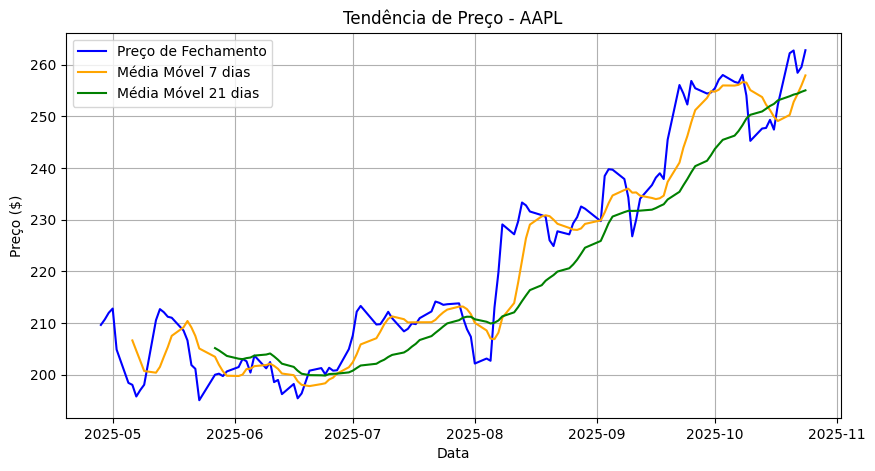

In [4]:
# Gráfico de tendência com médias móveis
plt.figure(figsize=(10,5))
plt.plot(acao["Close"], label="Preço de Fechamento", color="blue")
plt.plot(acao["MM7"], label="Média Móvel 7 dias", color="orange")
plt.plot(acao["MM21"], label="Média Móvel 21 dias", color="green")
plt.title("Tendência de Preço - AAPL")
plt.xlabel("Data")
plt.ylabel("Preço ($)")
plt.legend()
plt.grid(True)
plt.show()


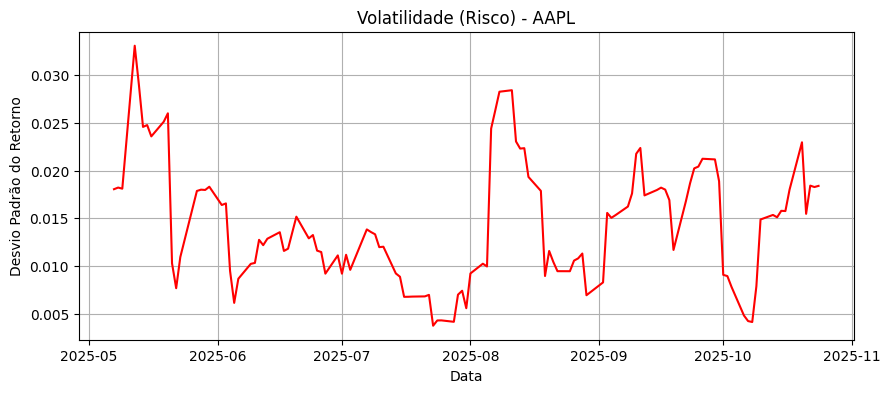

In [5]:
plt.figure(figsize=(10,4))
plt.plot(acao["Volatilidade"], color="red")
plt.title("Volatilidade (Risco) - AAPL")
plt.xlabel("Data")
plt.ylabel("Desvio Padrão do Retorno")
plt.grid(True)
plt.show()


## 📈 5. Cálculo das métricas financeiras

Vamos calcular as principais métricas de análise de investimento:

| Métrica | Descrição |
|----------|------------|
| **Retorno médio anualizado** | Crescimento médio do investimento |
| **Volatilidade anualizada** | Grau de variação (risco) |
| **Índice de Sharpe** | Retorno ajustado ao risco (quanto ganho por unidade de risco) |


## 📈 5. Cálculo das métricas financeiras

Vamos calcular as principais métricas de análise de investimento:

| Métrica | Descrição |
|----------|------------|
| **Retorno médio anualizado** | Crescimento médio do investimento |
| **Volatilidade anualizada** | Grau de variação (risco) |
| **Índice de Sharpe** | Retorno ajustado ao risco (quanto ganho por unidade de risco) |


In [7]:
# Removendo valores nulos de retorno
retornos = acao["Retorno"].dropna()

# Cálculos financeiros
retorno_medio = retornos.mean() * 252        # anualizado (252 dias úteis)
volatilidade = retornos.std() * np.sqrt(252) # anualizado
taxa_livre_risco = 0.04                      # 4% ao ano
sharpe = (retorno_medio - taxa_livre_risco) / volatilidade

print(f"📊 Retorno médio anual: {retorno_medio:.2%}")
print(f"📉 Volatilidade anual: {volatilidade:.2%}")
print(f"⚖️  Índice de Sharpe: {sharpe:.2f}")


📊 Retorno médio anual: 48.77%
📉 Volatilidade anual: 25.26%
⚖️  Índice de Sharpe: 1.77


## 🧠 6. Interpretação dos resultados

- **Retorno médio anual:** quanto o investimento cresceu em média ao longo do ano.  
- **Volatilidade:** quanto o preço varia (risco).  
- **Sharpe Ratio:** quanto de retorno é obtido por unidade de risco.

📘 **Interpretação:**
- **Sharpe > 1:** bom retorno ajustado ao risco  
- **Sharpe < 1:** risco alto para o retorno obtido  

> Exemplo:  
> “A ação da Apple teve retorno médio de 10% ao ano, com volatilidade de 15% e índice de Sharpe 0.8.  
> Isso significa que o retorno não compensa totalmente o risco.”


## 🔮 7. Conclusão

Com essa análise simples, vimos como a Data Science é aplicada nas finanças:

- Coletamos dados reais de mercado  
- Tratamos e transformamos as informações  
- Calculamos métricas que mostram **risco e retorno**
- Visualizamos tendências e comportamentos  

➡️ **Próximos passos (para projetos mais avançados):**
- Aplicar modelos de previsão (ARIMA, Prophet, LSTM)
- Analisar correlação entre diferentes ativos
- Criar uma carteira otimizada de investimentos
